In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
# Parametros
tamano_red = 5;
doble_sentido = false;
center_h_dist = 0.5;
sd_h_dist = 0;
h_distribution = Normal(center_h_dist, sd_h_dist);
n_cars = 1200;
ti = 0.0;
tf = 150.0;
max_n_dias = 50;
path_csv = "test.csv";

In [3]:
# Generacion de la red
red_cuadrada = create_square_network(tamano_red, both_ways=doble_sentido);
SqNet= red_cuadrada.digraph;
m = nv(SqNet);
posarr = red_cuadrada.position_array;
city_mt = red_cuadrada.city_matrix;

In [4]:
# Generacion de los autos
autos = generate_autos(m,tamano_red,red_cuadrada,n_cars,ti,tf,h_distribution);
tiempos_de_salida_snapshot = [auto.ts for auto in autos];

In [5]:
# simulacion
day_simulacion = 0;

while day_simulacion < max_n_dias
    print("día $(day_simulacion) \n")
    times, vels = simulacion!(0., red_cuadrada, autos);
    vels_summ = vels_summary(autos)
    travel_times = times_summary(autos)
    indexes = restart(autos, red_cuadrada, tiempos_de_salida_snapshot)

    df = DataFrame(speeds = [vels_summ],
                times = [travel_times],
                indexes = [indexes]
               )

    CSV.write(path_csv, df, append=true, writeheader = (day_simulacion==0))

    print(minimum(vels_summ)," ", mean(vels_summ),"\n")
    global day_simulacion += 1
end

día 0 
6.666666666666666

 10.291172344027176
día 1 


6.666666666666666 10.286400522416407
día 2 
6.666666666666667

 10.317946300773823
día 3 


6.666666666666667 10.309987127193875
día 4 
6.666666666666667

 10.32272066719112
día 5 


6.666666666666667 10.323242481293473
día 6 
6.799966554786472

 10.319601574793099
día 7 


6.82646649029467 10.325172938082595
día 8 
6.666666666666666

 10.287266899348667
día 9 


6.8102239198841525 10.27594117650273
día 10 
6.8102239198841525

 10.31602061644822
día 11 


6.834150128753734 10.317274937321788
día 12 
6.867646821171148

 10.321188566624757
día 13 


6.666666666666667 10.317039291420382
día 14 
6.8102239198841525

 10.328307172389987
día 15 


6.8102239198841525 10.320151226910758
día 16 
6.666666666666666

 10.302062117612941
día 17 


6.666666666666666 10.274773023234728
día 18 
6.666666666666667

 10.321611799298134
día 19 


6.666666666666667 10.31121220957099
día 20 
6.666666666666666

 10.311359283886112
día 21 


6.666666666666667 10.320733430086987
día 22 
6.8102239198841525

 10.322309349413608
día 23 


6.666666666666667 10.319517488766824
día 24 
6.666666666666666

 10.304225972683035
día 25 


6.666666666666667 10.277454224687363
día 26 
6.792279263231967

 10.30987339000149
día 27 


6.666666666666667 10.302843160603562
día 28 
6.666666666666667

 10.312252712255326
día 29 


6.8102239198841525 10.31389762041293
día 30 
6.666666666666666

 10.316638133328281
día 31 


6.8102239198841525 10.32471239439491
día 32 
6.666666666666666

 10.300933894789447
día 33 


6.666666666666666 10.276438999428377
día 34 
6.666666666666666

 10.30179759561009
día 35 


6.666666666666667 10.308871742143689
día 36 
6.794506525569069

 10.315537583003675
día 37 


6.666666666666667 10.314271322972099
día 38 
6.666666666666667

 10.319682346767628
día 39 


6.834150128753734 10.326607259195319
día 40 
6.666666666666667

 10.31899009561067
día 41 


6.666666666666666 10.278032737503787
día 42 
6.666666666666667

 10.314065552046015
día 43 


6.8102239198841525 10.325590020916898
día 44 
6.666666666666667

 10.326670824182564
día 45 


6.8102239198841525 10.322527892212186
día 46 
6.849295036527243

 10.317721820381857
día 47 


6.666666666666666 10.320948939228073
día 48 
6.666666666666666

 10.303466124376529
día 49 


6.666666666666666 10.278717035698799


# Read the file

In [13]:
reads=CSV.read(path_csv,DataFrame);

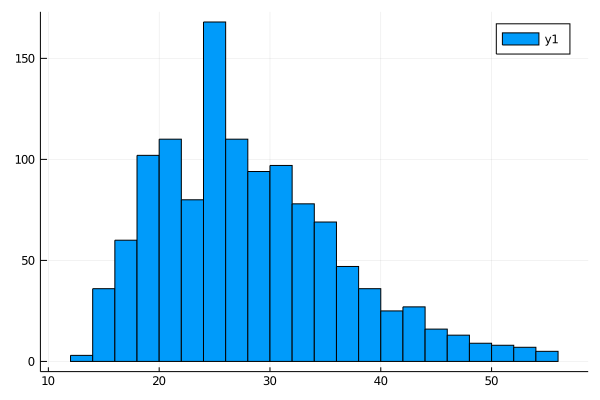

In [14]:
histogram(eval(Meta.parse(reads.times[45])))

In [15]:
mean(eval(Meta.parse(reads.speeds[45])))

10.828640139840273

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif")
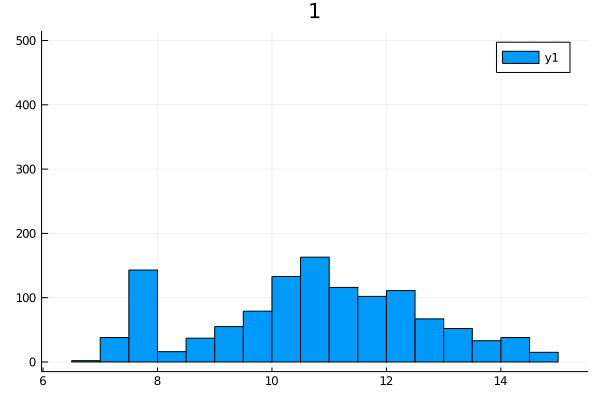

In [16]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.speeds[i])),nbins=15,ylim=[0,500],title = string(i))
end

gif(anim, "vels.gif", fps = 2)

In [17]:
minimum(eval(Meta.parse(reads.times[45])))

13.334485849806612

In [18]:
mean(eval(Meta.parse(reads.times[45])))

28.130834488361113

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif")
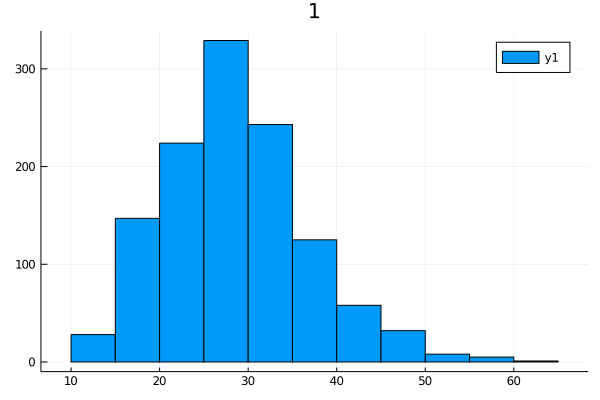

In [19]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.times[i])),nbins=15,title = string(i))
end

gif(anim, "times.gif", fps = 2)